# Ejercicio 3 ‚Äì Predicci√≥n de series temporales con Prophet

## ¬øQu√© es Prophet?

**Prophet** es una herramienta desarrollada por Facebook para facilitar el modelado de series temporales, especialmente √∫til cuando:

- Hay **tendencias y estacionalidades** claras.
- Hay **festivos o eventos especiales**.
- Se necesita una **herramienta sencilla pero flexible** sin profundos conocimientos estad√≠sticos.

Es muy utilizado en contextos empresariales y educativos por su simplicidad y eficacia.

## ¬øC√≥mo funciona?

Prophet descompone la serie en tres componentes principales:

\[
y(t) = g(t) + s(t) + h(t) + \varepsilon_t
\]

- `g(t)`: Tendencia (lineal, log√≠stica, piecewise)
- `s(t)`: Estacionalidad (diaria, semanal, anual)
- `h(t)`: Festivos o eventos especiales
- `Œµ`: Error aleatorio

---

## Flujo de trabajo

```mermaid
flowchart TD
    A[Dataset original] --> B[Renombrar columnas: ds, y]
    B --> C[Modelo Prophet b√°sico]
    C --> D[Predicci√≥n futura]
    D --> E[Visualizaci√≥n]
    E --> F[Modelo con regresores externos]
    F --> G[Comparaci√≥n de rendimiento]
```

---

## Requisitos previos
```bash
pip install prophet
```

---

## Parte 1 ‚Äì Modelo Prophet

### Paso 1: Preparar el dataset

In [2]:
from prophet import Prophet
import pandas as pd

# Cargar y preparar datos
df = pd.read_csv("data/m5_consumo_energia_train.csv", index_col=0)
df = df.set_index(pd.to_datetime(df.index))

df['dt'] = df.index

# Prophet requiere columnas: 'ds' para fecha y 'y' para valor
train_df = df.rename(columns={"dt": "ds", "Energia Consumida": "y"})

Importing plotly failed. Interactive plots will not work.


In [3]:
val_df = pd.read_csv("data/m5_consumo_energia_test.csv", index_col=0)
val_df = val_df.set_index(pd.to_datetime(val_df.index))
val_df['dt'] = val_df.index
val_df = val_df.rename(columns={"dt": "ds", "Energia Consumida": "y"})

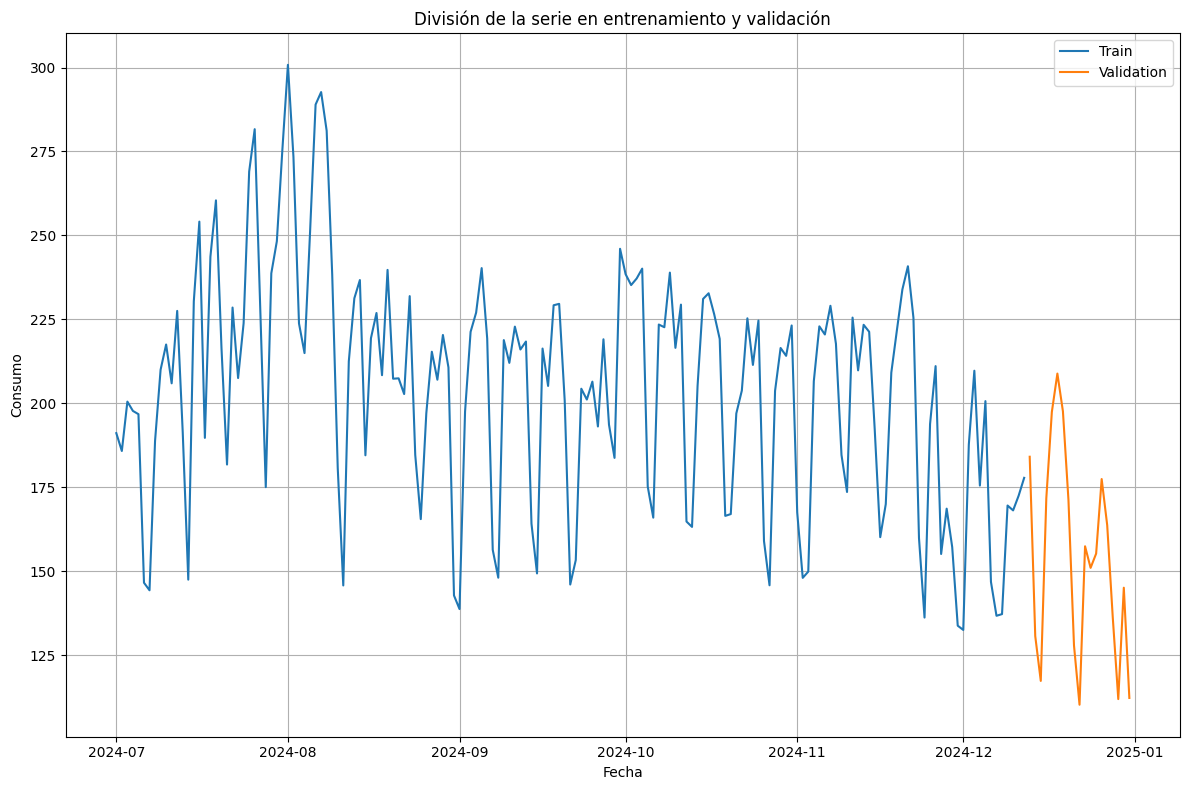

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(train_df.index, train_df["y"], label="Train")
plt.plot(val_df.index, val_df["y"], label="Validation")
plt.title("Divisi√≥n de la serie en entrenamiento y validaci√≥n")
plt.xlabel("Fecha")
plt.ylabel("Consumo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

### Paso 2: Crear y entrenar el modelo

In [5]:
t_df = train_df[['ds','y']]
m = Prophet()
m.fit(t_df)

07:46:57 - cmdstanpy - INFO - Chain [1] start processing
07:47:00 - cmdstanpy - INFO - Chain [1] done processing


---

### Paso 3: Crear futuro y predecir

In [6]:
# Predecir los pr√≥ximos 30 d√≠as
future = m.make_future_dataframe(periods=len(val_df))
forecast = m.predict(future)

---

### Paso 4: Visualizar resultado

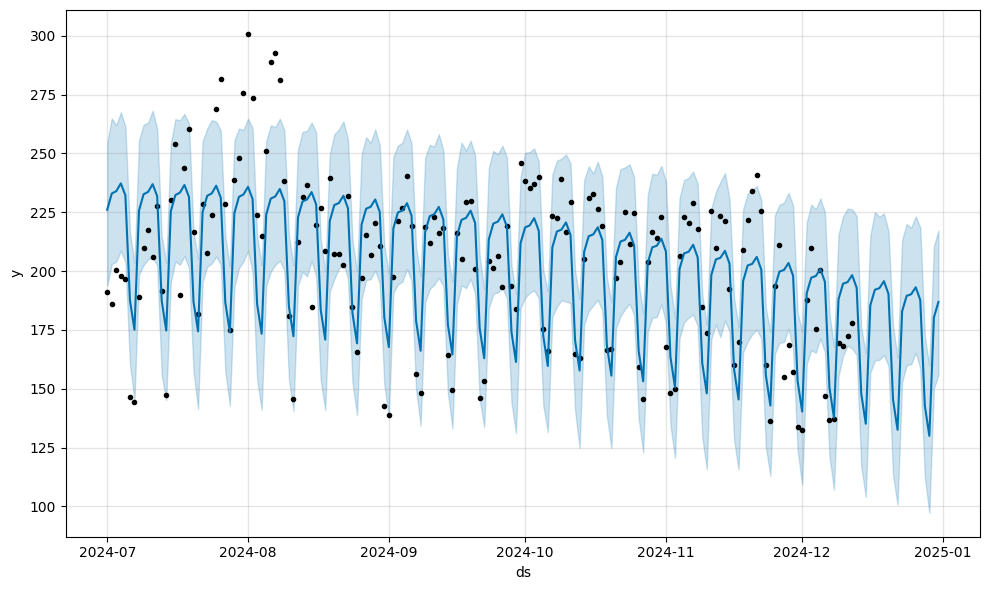

In [7]:
fig1 = m.plot(forecast)

#### Explicaci√≥n

Este es el **gr√°fico principal de predicci√≥n de Prophet**. Incluye:

- La **predicci√≥n** realizada por el modelo (l√≠nea azul).
- Un **intervalo de confianza del 95%** alrededor de la predicci√≥n (franja azul claro).
- El **ajuste del modelo** a la serie original (puntos negros).

üîç **Interpretaci√≥n**:
- El prop√≥sito de los puntos es permitirte ver c√≥mo el modelo ha capturado los patrones de la serie temporal y si hay una buena correspondencia entre los datos observados y las componentes ajustadas. Si los puntos negros siguen de cerca las curvas modeladas, eso sugiere que el modelo est√° ajustado correctamente.
- La l√≠nea azul contin√∫a donde termina la serie original y muestra el valor estimado para todo el rango, incluyendo los d√≠as futuros.
- El √°rea azul claro indica la **incertidumbre** del modelo en cada punto (m√°s ancho = m√°s incertidumbre).

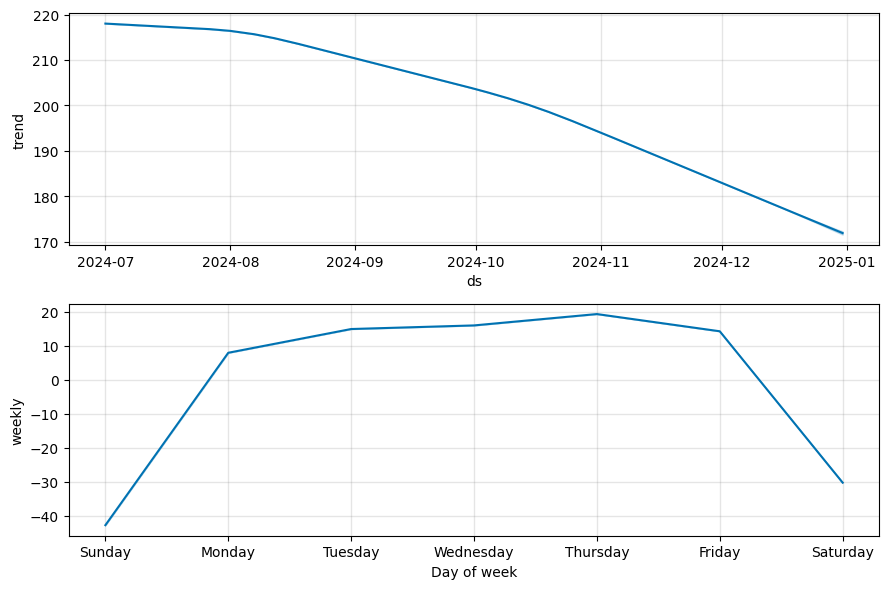

In [8]:
fig2 = m.plot_components(forecast)

### Explicaci√≥n

Este genera **una visualizaci√≥n separada de los componentes del modelo Prophet**:

1. **Tendencia (trend)**:  
   La evoluci√≥n a largo plazo del consumo.  
   Puedes ver si hay una subida, bajada, o tramos con crecimientos distintos.

2. **Estacionalidad semanal** (si existe):  
   C√≥mo var√≠a el consumo seg√∫n el d√≠a de la semana (por ejemplo, m√°s consumo entre semana que los fines de semana).

3. **Estacionalidad anual** (si hay suficientes datos):  
   Fluctuaciones repetitivas a lo largo del a√±o (m√°s relevante con >1 a√±o de datos).

4. **Otros componentes**:  
   Si has a√±adido **regresores** o **festivos**, tambi√©n se incluir√°n aqu√≠.

üîç **Interpretaci√≥n**:
- Este gr√°fico permite entender **qu√© patrones ha aprendido el modelo**, m√°s all√° de la predicci√≥n final.
- Es ideal para explicar el comportamiento estacional a otras personas no t√©cnicas.

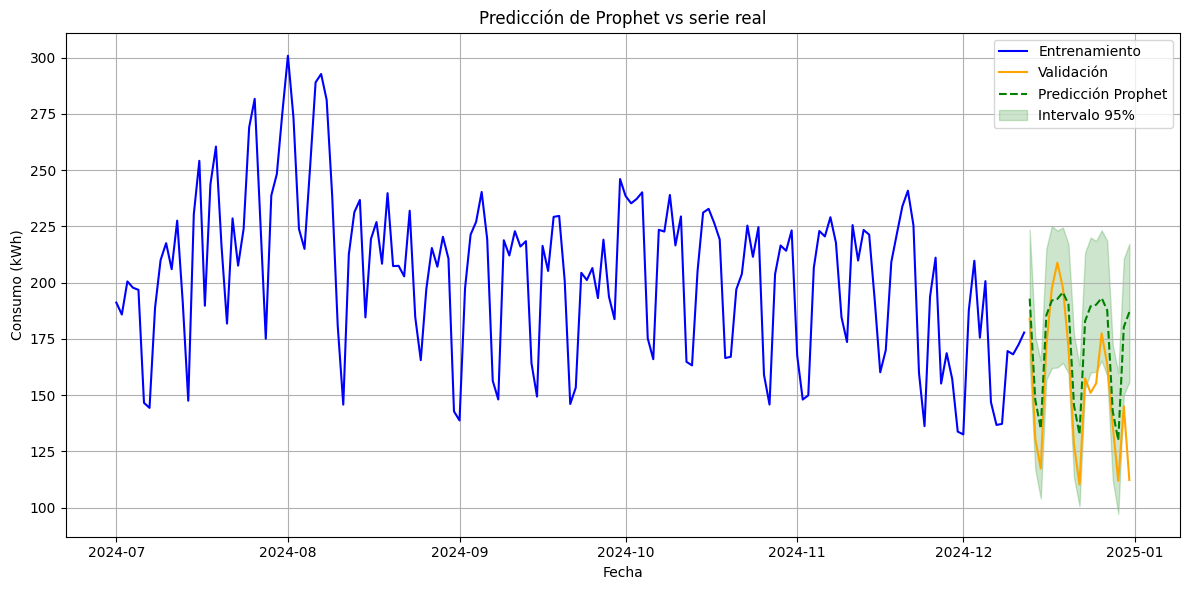

In [9]:
import matplotlib.pyplot as plt

# Tambi√©n puedes obtener el final de train como referencia
cutoff_date = train_df["ds"].max()

# Filtramos la parte futura del forecast
forecast_future = forecast[forecast["ds"] > cutoff_date]

# Graficamos todo
plt.figure(figsize=(12, 6))

# Serie real
plt.plot(train_df["ds"], train_df["y"], label="Entrenamiento", color="blue")
plt.plot(val_df["ds"], val_df["y"], label="Validaci√≥n", color="orange")

# Predicci√≥n
plt.plot(forecast_future["ds"], forecast_future["yhat"], label="Predicci√≥n Prophet", color="green", linestyle="--")

# Intervalo de confianza
plt.fill_between(forecast_future["ds"],
                 forecast_future["yhat_lower"],
                 forecast_future["yhat_upper"],
                 color="green", alpha=0.2, label="Intervalo 95%")

# Formato
plt.title("Predicci√≥n de Prophet vs serie real")
plt.xlabel("Fecha")
plt.ylabel("Consumo (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

### Paso 5: Evaluar el rendimiento del modelo

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(val_df["y"], forecast_future["yhat"])
rmse = np.sqrt(mean_squared_error(val_df["y"], forecast_future["yhat"]))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 21.70
RMSE: 26.82


In [13]:
t_df['holidays'] = t_df[t_df.index.day > 5]
t_df.loc['2024/11/01'] = 1
t_df.loc['2024/12/06'] = 1
t_df.loc['2024/12/08'] = 1
m = Prophet(holidays=t_df['holidays'])

ValueError: Cannot set a DataFrame with multiple columns to the single column holidays

---

## Parte 2 ‚Äì Modelado con regresores externos

Un **regresor** es una variable adicional que se incluye en el modelo para ayudar a explicar las variaciones del valor que queremos predecir.

En el contexto de consumo de energ√≠a, algunos ejemplos de regresores pueden ser:

- Temperatura (afecta al uso de aire acondicionado o calefacci√≥n)
- Humedad (relacionada con el uso de sistemas de ventilaci√≥n o agua)
- D√≠a de la semana (influye en el comportamiento de consumo en edificios)

### ¬øQu√© aporta un regresor?
**Mejora la precisi√≥n del modelo**
Al introducir una variable que est√° correlacionada con la serie temporal, el modelo puede anticiparse mejor a ciertos cambios o fluctuaciones que no se explican solo con el tiempo.

**Captura relaciones causales**
Un regresor puede reflejar una relaci√≥n de causa y efecto real. Por ejemplo, sabemos que a mayor temperatura, probablemente aumenta el consumo energ√©tico por el uso de aire acondicionado.

**Permite simular escenarios**
Si el modelo incluye regresores, podemos simular ‚Äú¬øqu√© pasar√≠a si...?‚Äù variara la temperatura o la humedad, lo que es √∫til para escenarios educativos o de planificaci√≥n.

**Reduce el error**
En muchos casos, incluir regresores mejora m√©tricas como MAE o RMSE, porque el modelo puede explicar parte del comportamiento que antes consideraba ‚Äúruido‚Äù.

### Paso 1: Visualizar correlaciones

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlaci√≥n
corr = train_df[['y','Temperatura','Humedad']].corr()

# Representar heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaci√≥n entre variables")
plt.tight_layout()
plt.show()

### Paso 2: A√±adir regresores al dataframe

In [ ]:
# Preparar dataset con variables externas (Temperatura y Humedad)
train_reg_df = df.reset_index().rename(columns={
    "dt": "ds",
    "Energia Consumida": "y"
})

# A√±adir regresores
train_reg_df["temperatura"] = df["Temperatura"].values
train_reg_df["humedad"] = df["Humedad"].values

In [ ]:
train_reg_df[['y','temperatura','humedad']].plot()

---

### Paso 3: Definir modelo con regresores

In [ ]:
m_reg = Prophet()
m_reg.add_regressor("temperatura")
m_reg.add_regressor("humedad")

m_reg.fit(train_reg_df)

---

### Paso 3: Crear futuro con regresores

In [ ]:
all_df = pd.concat([train_df, val_df], axis=0)
all_df

In [ ]:
# Generar mismo n√∫mero de d√≠as futuros
future_reg = m_reg.make_future_dataframe(periods=len(val_df))
future_reg = future_reg.set_index(pd.to_datetime(future_reg['ds']))
# Aqu√≠ usamos el valor real de cada variable meteorol√≥gica
future_reg["temperatura"] = all_df['Temperatura']
future_reg["humedad"] = all_df['Humedad']


In [ ]:
future_reg

---

### Paso 4: Predecir y visualizar

In [ ]:
forecast_reg = m_reg.predict(future_reg)

# Visualizaci√≥n
fig1 = m_reg.plot(forecast_reg)
fig2 = m_reg.plot_components(forecast_reg)

In [ ]:
import matplotlib.pyplot as plt

# Tambi√©n puedes obtener el final de train como referencia
cutoff_date = train_df["ds"].max()

# Filtramos la parte futura del forecast
forecast_reg_future = forecast_reg[forecast_reg["ds"] > cutoff_date]

# Graficamos todo
plt.figure(figsize=(12, 6))

# Serie real
plt.plot(train_df["ds"], train_df["y"], label="Entrenamiento", color="blue")
plt.plot(val_df["ds"], val_df["y"], label="Validaci√≥n", color="green")

# Predicci√≥n
plt.plot(forecast_reg_future["ds"], forecast_reg_future["yhat"], label="Predicci√≥n Prophet", color="orange", linestyle="--")

# Intervalo de confianza
plt.fill_between(forecast_reg_future["ds"],
                 forecast_reg_future["yhat_lower"],
                 forecast_reg_future["yhat_upper"],
                 color="blue", alpha=0.2, label="Intervalo 95%")

# Formato
plt.title("Predicci√≥n de Prophet vs serie real")
plt.xlabel("Fecha")
plt.ylabel("Consumo (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

### Paso 5: Evaluar el modelo

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(val_df["y"], forecast_reg_future["yhat"])
rmse = np.sqrt(mean_squared_error(val_df["y"], forecast_reg_future["yhat"]))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

## Capacidades de Prophet

Los par√°metros que se utilizan al crear un modelo Prophet est√°n relacionados con el manejo de las tendencias, estacionalidades y festividades. Aqu√≠ est√°n los principales par√°metros que puedes ajustar al usar **Prophet()**:

### 1. **`growth`**:
   - Especifica la forma de la tendencia.
     - **'linear'**: Utiliza una tendencia lineal.
     - **'logistic'**: Utiliza una tendencia log√≠stica (crecimiento con un l√≠mite superior definido).
   - **Por defecto** es **'linear'**.

### 2. **`changepoint_prior_scale`**:
   - Controla la flexibilidad de la tendencia. Es un par√°metro regularizador que determina cu√°n r√°pido puede cambiar la tendencia en funci√≥n de los puntos de cambio.
   - **Valores m√°s altos** permiten que la tendencia cambie de forma m√°s abrupta, mientras que **valores m√°s bajos** restringen esos cambios.
   - **Por defecto** es **0.05**.

### 3. **`seasonality_prior_scale`**:
   - Ajusta la flexibilidad del componente estacional. Controla cu√°nto puede variar la estacionalidad a lo largo del tiempo.
   - **Valores altos** permiten mayor flexibilidad en la estacionalidad, mientras que **valores bajos** lo restringen.
   - **Por defecto** es **10.0**.

### 4. **`holidays_prior_scale`**:
   - Similar al par√°metro de estacionalidad, pero controla la flexibilidad de los efectos de las festividades.
   - Si no se agregan festividades al modelo, este par√°metro no tiene efecto.
   - **Por defecto** es **10.0**.

### 5. **`seasonality_mode`**:
   - Controla c√≥mo se modela la estacionalidad.
     - **'additive'**: La estacionalidad se suma a la tendencia.
     - **'multiplicative'**: La estacionalidad multiplica la tendencia.
   - **Por defecto** es **'additive'**.

### 6. **`yearly_seasonality`**:
   - Activa o desactiva la estacionalidad anual. Si se pone en `True`, Prophet a√±adir√° autom√°ticamente un componente de estacionalidad anual.
   - **Por defecto** es **True** si la frecuencia de los datos es anual, de lo contrario, se ajusta autom√°ticamente seg√∫n los datos.

### 7. **`weekly_seasonality`**:
   - Activa o desactiva la estacionalidad semanal.
   - **Por defecto** es **True** si los datos contienen suficiente informaci√≥n para modelar una estacionalidad semanal.

### 8. **`daily_seasonality`**:
   - Activa o desactiva la estacionalidad diaria.
   - **Por defecto** es **True** si los datos contienen suficiente informaci√≥n para modelar una estacionalidad diaria.

### 9. **`seasonality`**:
   - Puedes proporcionar estacionalidades adicionales personalizadas para incluir en el modelo. Es √∫til cuando deseas a√±adir estacionalidades espec√≠ficas (por ejemplo, trimestrales).
   - Acepta una lista de objetos que definen la estacionalidad adicional.

### 10. **`holidays`**:
   - Puedes a√±adir un dataframe de festividades que afecten la serie temporal. Las festividades pueden ser estacionales o espec√≠ficas de ciertos d√≠as (por ejemplo, Navidad, A√±o Nuevo).
   - Debe ser un DataFrame con las columnas **'holiday'** (nombre de la festividad), **'ds'** (fecha de la festividad) y **'lower_window' y 'upper_window'** (para definir el rango de d√≠as de la festividad).

### 11. **`interval_width`**:
   - Define el ancho del intervalo de confianza para las predicciones. Este par√°metro controla el rango en el que se espera que se encuentren las predicciones.
   - **Por defecto** es **0.80**, lo que significa un intervalo de confianza del 80%.

### 12. **`uncertainty_samples`**:
   - Determina cu√°ntas muestras de incertidumbre se generan para estimar el intervalo de confianza.
   - **Por defecto** es **1000**, lo que genera 1000 muestras.

### 13. **`cap` y `floor`**:
   - Cuando se utiliza el modelo con **'logistic'** en lugar de **'linear'**, puedes definir un valor m√°ximo (**cap**) y m√≠nimo (**floor**) para limitar la tendencia log√≠stica. Esto es √∫til cuando esperas que la serie temporal tenga un crecimiento limitado (por ejemplo, usuarios de una plataforma que no pueden superar un n√∫mero m√°ximo de usuarios).

### 14. **`mcmc_samples`**:
   - Si se establece un valor mayor que cero, Prophet utiliza un enfoque basado en MCMC (Monte Carlo Markov Chain) para las predicciones, lo que puede ser √∫til cuando se requiere una estimaci√≥n m√°s precisa de la incertidumbre.

### 15. **`interval_width`**:
   - Determina el ancho del intervalo de predicci√≥n (por ejemplo, 0.95 corresponder√≠a a un intervalo de confianza del 95%).

### 16. **`prophet.growth()`**:
   - Este par√°metro se refiere al crecimiento de la serie temporal, que puede ser lineal o log√≠stico.

---

### Ejemplo de ajuste de par√°metros en Prophet
```python
modelo = Prophet(
    growth='linear',               # Tendencia lineal
    changepoint_prior_scale=0.05,  # Flexibilidad de los puntos de cambio
    seasonality_prior_scale=10.0,  # Flexibilidad de la estacionalidad
    holidays_prior_scale=10.0,     # Flexibilidad de las festividades
    yearly_seasonality=True,       # Estacionalidad anual
    weekly_seasonality=True        # Estacionalidad semanal
)

```

---

## ‚úÖ Resultado esperado

- Preparar tus datos en formato adecuado para Prophet.
- Entrenar modelos con y sin regresores externos.
- Visualizar tendencias, estacionalidades y componentes.
- Comparar predicciones y detectar el efecto de variables como temperatura o humedad.